In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Midterm 1 Study Guide

So far in this class, we have worked with the following topics.

* Rootfinding
  * Midpoint Methods
  * Newton and Secant Methods
  * Convergence classes of iterative methods (q-linear and q-quadratic)
* Conditioning of problems
* Stability of algorithms
* Numerical Linear Algebra
  * Thinking abstractly about vectors
  * Inner products and norms
  * Projectors $P = I - v v^T$ where $\lVert v \rVert = 1$
  * Reflectors $F = I - 2 v v^T$ where $\lVert v \rVert = 1$
  * Gram-Schmidt algorithm for QR factorization
  * Householder algorithm for QR factorization
  * Leading order cost of algorithms (like big-$O$, but we quantify the leading coefficient)
  * Solution of linear equations and linear least squares problems
  
I recommend reviewing the class notebooks, in-class activities, and homeworks.  Below, I'll give some discussion of the sort of questions that I could ask.

## Rootfinding

All rootfinding methods attempt to find $x$ such that $f(x) = 0$, but they require different information about $f$ and/or where to look.
If we know $f'(x) < 0$, which methods can be used?  What if we also know that $f(a) > 0 > f(b)$?  Does any method guarantee that we find a unique solution?

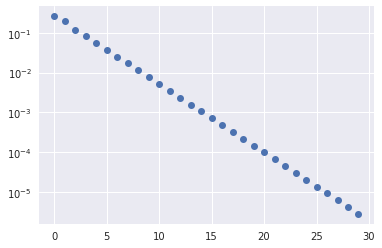

In [2]:
def iterate(f, x0, n):
    """Apply n iterations of x_{i+1} = f(x_i),
    return resulting history as an array.
    """
    hist = [x0]
    for i in range(n):
        hist.append(f(hist[i]))
    return np.array(hist)

def f1(x):
    return np.cos(x)

hist1 = iterate(f1, 1, 80)
x_star = hist1[-1] # Suppose the last estimate is best
plt.semilogy(np.abs(hist1[:30] - x_star), 'o');

What convergence class is the above figure evidence of?

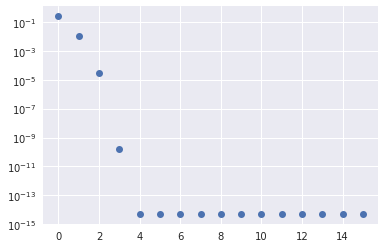

In [3]:
def f2(x):
    return x - (np.cos(x) - x) / (-np.sin(x) - 1)

hist2 = iterate(f2, 1, 15)
plt.semilogy(np.abs(hist2 - x_star), 'o');

What convergence class is the above plot evidence of?

What happens after the fourth iteration?

Can you sketch a function such that Newton exhibits a certain behavior, such as error decreasing while residual increases?

## Conditioning

You should be able to estimate (relative) condition numbers (a finite number or $\infty$) for differentiable functions such as $\sin x$ at a given value of $x$.  Recall that for differentiable functions, the relative condition number is
$$ \kappa = \lvert f'(x) \rvert \frac{\lvert x \rvert}{\lvert f(x) \rvert} . $$
You should be able to estimate condition number for a $2\times 2$ diagonal matrix, for example.

## Stability

You should be able to recognize unstable algorithms, such as in the activity where we computed $\exp(-20)$ by directly evaluating the Taylor series.

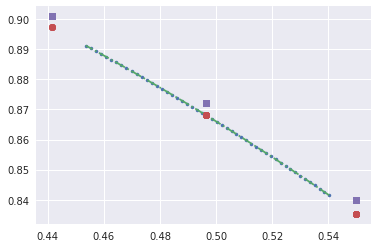

In [4]:
def g1(theta):
    return np.array([np.cos(theta), 
                     np.sin(theta)])

def g2(theta):
    return np.array([np.cos(theta),
                    np.cos(theta - np.pi/2)])

theta = np.linspace(1, 1.1)
plt.plot(*g1(theta), '.')
plt.plot(*g2(theta), '-.')
plt.plot(*g1(theta + np.pi*1e14), 'o')
plt.plot(*g2(theta + np.pi*1e14), 's');

Can you explain the plot above?  Is there evidence that one of these functions (`g1` or `g2`) is backward stable?

## Numerical Linear Algebra

If $u$ and $v$ are vectors and I propose a function $h(u, v)$, can you determine whether it is an inner product?

There are two Moodle quizes about projections and matrix transformations.  If I ask a similar question, can you understand the terminology and show whether a property is true?

Is an orthogonal projector an orthogonal matrix?

If $Q$ has orthonormal columns, is $Q^T Q = Q Q^T$?  What if $Q$ is square?

In [5]:
def factor(A):
    A = A.copy()
    n = len(A)
    for i in range(n):
        ai = 1/A[i, i]
        A[i+1:, i] *= ai
        A[i+1:, i+1:] -= np.outer(A[i+1:, i], A[i, i+1:])
    return np.tril(A, -1) + np.eye(n), np.triu(A)

A = np.random.randn(4, 4)
L, U = factor(A)
np.linalg.norm(L @ U - A)

3.3422138886441676e-16

Which line in the above function is most expensive?

How much does it cost on the first iteration?

Can you write a sum of the cost over all loop iterations?

Can you write a $2\times 2$ matrix such that the above code fails?

Given a collection of vectors, how can you use QR factorization to build an orthogonal basis that spans the same space and where all but one vector has mean zero?

Given a matrix $A$, can you devise an elementary reflector $F = I - 2 v v^T$ such that the first column of the product $F A$ is a constant vector (all entries the same)?